In [9]:
import thermo as th
import thermo.interaction_parameters as ip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Look up chemical constants/properties from database
constants, properties = th.ChemicalConstantsPackage.from_IDs(['methane', 'ethane', 'propane'])

# Look up binary interaction parameters from database
kijs = ip.IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')

eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs,
              'omegas': constants.omegas, 'kijs': kijs}

# Create individual gas and liquid phase EOSs
gas = th.CEOSGas(th.PRMIX, eos_kwargs,
                 HeatCapacityGases=properties.HeatCapacityGases)
liquid = th.CEOSLiquid(th.PRMIX, eos_kwargs,
                       HeatCapacityGases=properties.HeatCapacityGases)

# Create VL flasher
flasher = th.FlashVL(constants, properties, liquid=liquid, gas=gas)

In [3]:
P_rel = 1e6 #Pa
zs = [0.1, 0.4, 0.5]
num_points = 25

In [52]:
Ts = np.linspace(flasher.flash(P=P_rel, VF=0, zs=zs).T,
                 flasher.flash(P=P_rel, VF=1, zs=zs).T,
                 num_points)
dT = Ts[1] - Ts[0]

In [6]:
@np.vectorize
def find_props(T):
    state = flasher.flash(P=P_rel, T=T, zs=zs)
    return state.VF, state.H(), state.Cp()

In [7]:
VFs, Hs, Cps = find_props(Ts)

Text(0, 0.5, 'Temperature (K)')

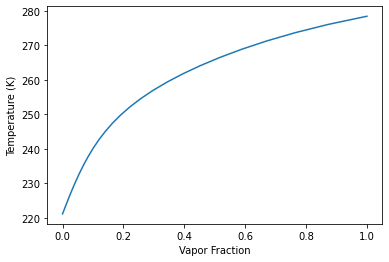

In [15]:
plt.plot(VFs, Ts)
plt.xlabel('Vapor Fraction')
plt.ylabel('Temperature (K)')

Text(0, 0.5, 'Total dH (J/mol)')

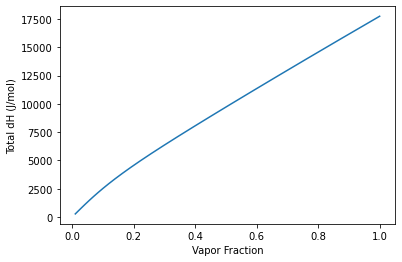

In [51]:
total_dHs = Hs[1:]-Hs[0]
plt.plot(VFs[1:], (total_dHs))
plt.xlabel('Vapor Fraction')
plt.ylabel('Total dH (J/mol)')

In [37]:
avg_Cps = (Cps[:-1] + Cps[1:])/2.0

In [48]:
specific_dHs = np.add.accumulate(avg_Cps * dT)

In [49]:
latent_dHs = total_dHs - specific_dHs

Text(0, 0.5, 'Vaporization dH per mol Vapor (J/mol)')

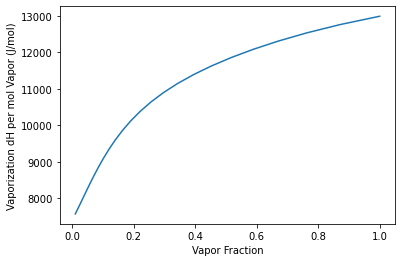

In [50]:
total_dHs = Hs[1:]-Hs[0]
plt.plot(VFs[1:], (latent_dHs/VFs[1:]))
plt.xlabel('Vapor Fraction')
plt.ylabel('Vaporization dH per mol Vapor (J/mol)')